# Task 1:Advance Practical Data Science
First data science problem: given a list of wine characteristics, the goal is to predict the quality of that wine.

Here, the quality of a wine is an integer value in the range of 0 (very bad) to 10 (very good). In the train data this quality is given for each wine. Your task is to predict this value for the test data.

Please follow the steps discussed in the lectures to approach the task.

1.Perform Exploratory Data Analysis (EDA) on the data.

2.Based on the EDA, build a model that predicts wine quality for the wines listed in the test set.

3.Submit your solutions to this competition website. The scoring metric is the Mean Absolute Error (MAE).

4.Prepare a presentation, containing your main findings in EDA, how you translated them to your predictive model, and an evaluation of your model. Present your results in class on November 16th.

### Program Outline
1.Wrangle Data

2.Preprocess data

3.Evaluation and analysis

4.Visualization

5.Importance of features

6.Train Model

7.Predict on Test data

## Step 1:Import libraries and modules

In [2]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Step 2:Load wine quality dataset

In [32]:
def load_train_test_data(train_file,test_file):
    # Read in data as a dataframe
    original_train_data = pd.read_csv('train_data.csv')
    original_test_data = pd.read_csv("test_data.csv")
    return [original_train_data,original_test_data]

train_file = 'train_data.csv'
test_file ='test_data.csv'
[original_train_data,original_test_data] = load_train_test_data(train_file,test_file)
print("Train Data",original_train_data.shape)
print("Test Data",original_test_data.shape)

Train Data (5150, 13)
Test Data (1347, 13)


## Step 3:Wrangle Data

In [42]:
def wrangle_data(train_data):
    #data_train.isnull().sum()
    #missing values
    missing_data = train_data[train_data.isnull()==True].count()
    print("Overall empty data fields:",missing_data.sum())
    
wrangle_data(original_train_data)

Overall empty data fields: 0


## Step 4:Exploratory Data Analysis

### Analyse features

Know the features of data

In [14]:
def analyse_dataset(features_train,feature):
    features_train.columns
    # Descriptive statistics for each column
    #features.describe()
    pd.set_option('precision', 2)
    print(round(features_train.describe(), 2))
    print(features_train[feature].unique())
    print(features_train[feature].value_counts())
    print(features_train[feature].describe())
    
analyse_dataset(original_train_data,"quality")

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count        5150.00           5150.00      5150.00         5150.00   
mean            7.22              0.34         0.32            5.44   
std             1.30              0.17         0.15            4.81   
min             3.80              0.08         0.00            0.60   
25%             6.40              0.23         0.25            1.80   
50%             7.00              0.29         0.31            2.90   
75%             7.70              0.41         0.40            8.10   
max            15.90              1.58         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    5150.00              5150.00               5150.00  5150.00  5150.00   
mean        0.06                30.63                115.71     0.99     3.22   
std         0.04                18.03                 56.81     0.00     0.16   
min         0.01                 1.0

Get a summary of features of data,such as distribution(mean,min,max and standard deviation)
Analyse the features to indentify any anomalies in the scaling of features,such as density of pH being too high.
Also compare feature scaling with respect to eachother

Find out about the target variable of the dataset,if it is continuous or discrete

Find out about the frequency of the discrete target values of the wine dataset

Learn more about the target values of the wine data set(distribution of a feature explains alot)

Histogram of the target variable of the dataset explains that some of the quality values do not appear often enough for the model to properly learn features and pattern leading to those quality values

### Histogram of labels

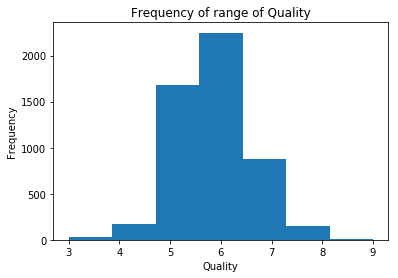

In [40]:
def EDA_histogram(features_train):
    import matplotlib.pyplot as plt
   
 
    rng = features_train['quality']
    plt.hist(rng,bins = 7)  # arguments are passed to np.histogram
    plt.title("Frequency of range of Quality")
    plt.xlabel("Quality")
    plt.ylabel("Frequency")
    #plt.savefig("hist.png")
    plt.show()
  
EDA_histogram(original_train_data)

Correlation of the features explains how relationship between two features.
Correlation is a measure that determines the degree to which two variables' movements are associated.
-1.0 indicates a perfect negative correlation, and a correlation of 1.0 indicates a perfect positive correlation.

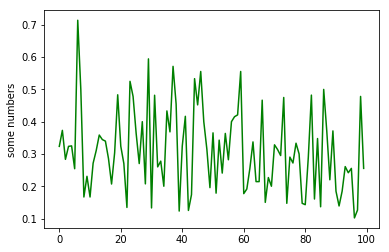

In [108]:
def plotGraphs():
    import matplotlib.pyplot as plt
    from sklearn import preprocessing
    x = original_train_data["free sulfur dioxide"]
    x1 = original_train_data["total sulfur dioxide"]


    plt.plot(1/(x1[0:100]/x[0:100]),color="g")
    plt.ylabel('some numbers')
    plt.show()
    return 
plotGraphs()

### Correlation of features

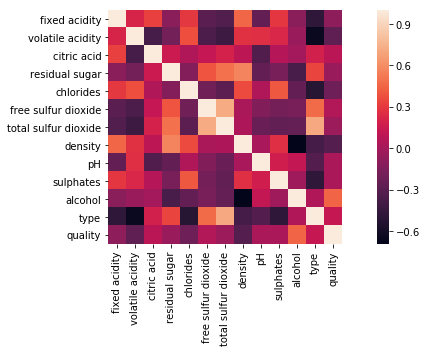

In [20]:
def EDA_corr(features_train):
    #Correlation of features
    cmat = features_train.corr()
    f, ax = plt.subplots(figsize=(10,5))
    sns.heatmap(cmat,square=True)
    f.tight_layout()
    #plt.savefig("corr.png")
    plt.show()
    

EDA_corr(original_train_data)



### EDA using boxplot

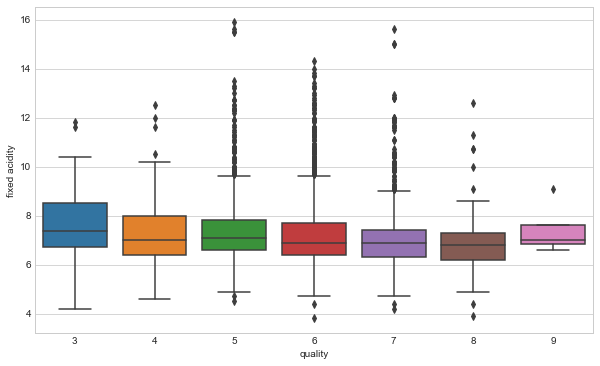

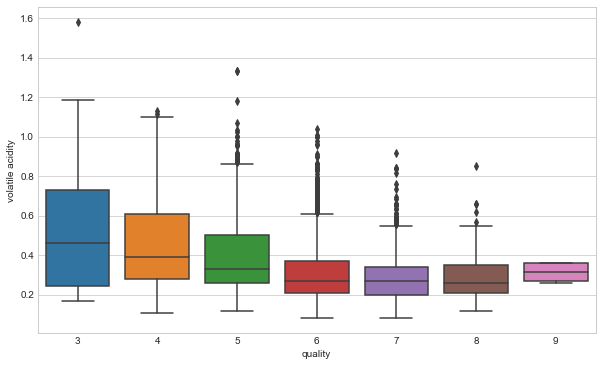

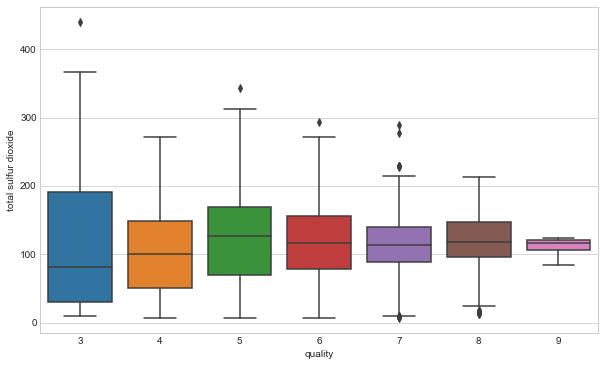

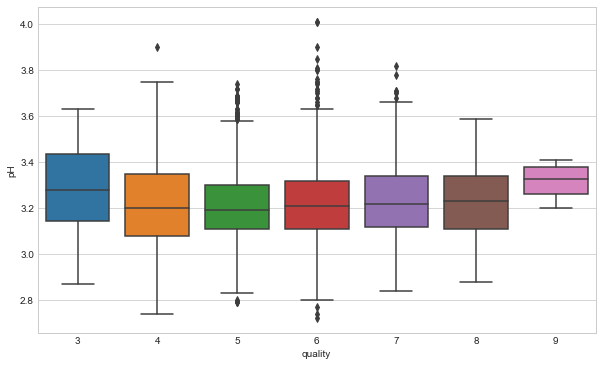

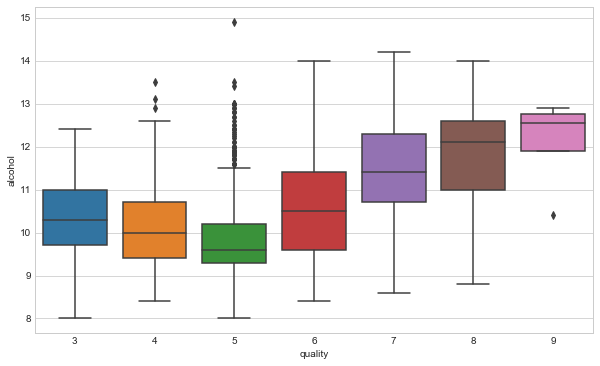

In [87]:
def EDA_boxplot(features_train):
    #https://seaborn.pydata.org/generated/seaborn.boxplot.html
    #https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-small-multiples-of-data-subsets
    import seaborn as sns
    import matplotlib.pyplot as plt
    #data_train['fixed acidity'] = np.log10(data_train['fixed acidity'])
    fig = plt.figure(figsize = (10,6))
    sns.set_style("whitegrid")
    ax = sns.boxplot(x="quality", y="fixed acidity", data=features_train)
    plt.savefig("fixed_acid_boxplot.png")
    
    fig = plt.figure(figsize = (10,6))
    #data_train['volatile acidity'] = np.log10(data_train['volatile acidity'])
    ax = sns.boxplot(x="quality", y="volatile acidity", data=features_train)
    plt.savefig("volatile_acid_boxplot.png")
    
    fig = plt.figure(figsize = (10,6))
    #data_train['total sulfur dioxide'] = np.log10(data_train['total sulfur dioxide'])
    ax = sns.boxplot(x="quality", y="total sulfur dioxide", data=features_train)
    plt.savefig("sulfur_dioxide_boxplot.png")
    
    fig = plt.figure(figsize = (10,6))
    #data_train['pH'] = np.log10(data_train['pH'])
    ax = sns.boxplot(x="quality", y="pH", data=features_train)
    plt.savefig("pH_boxplot.png")
    
    fig = plt.figure(figsize = (10,6))
    #data_train['alcohol'] = np.log10(data_train['alcohol'])
    ax = sns.boxplot(x="quality", y="alcohol", data=features_train)
    plt.savefig("alcohol_boxplot.png")
    
EDA_boxplot(original_train_data)


## EDA with barplot

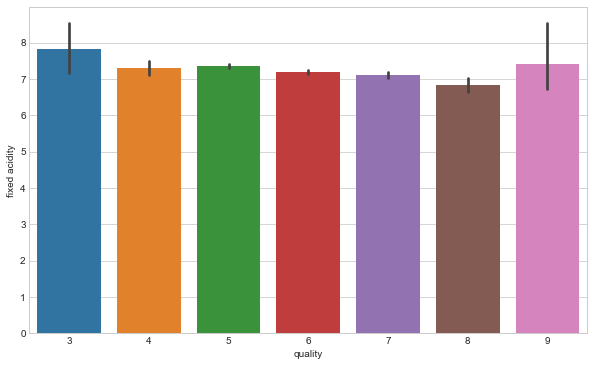

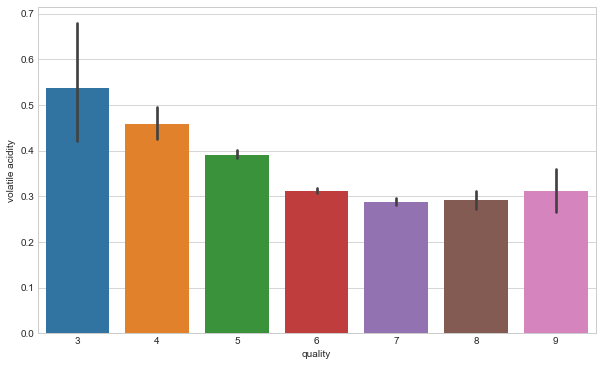

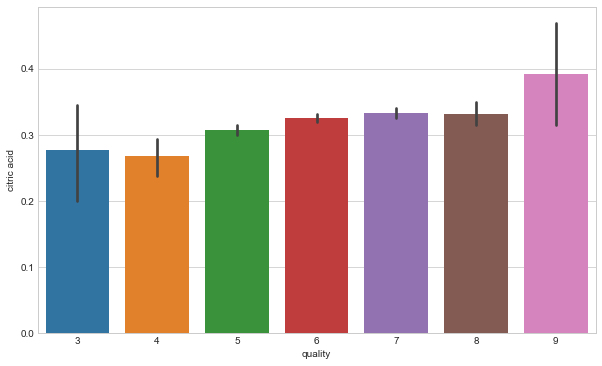

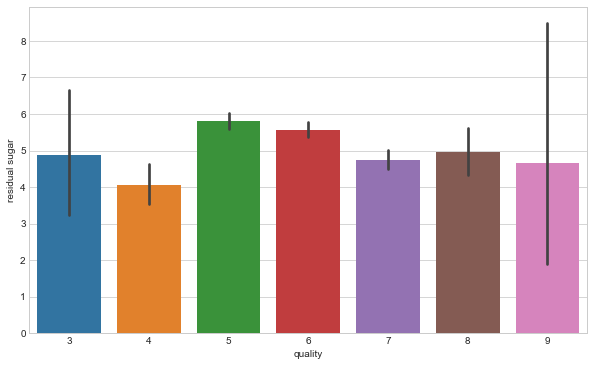

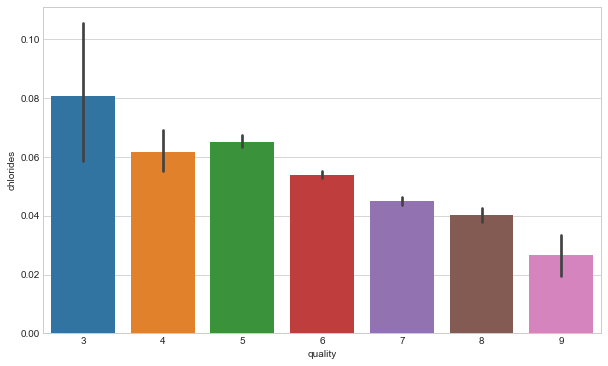

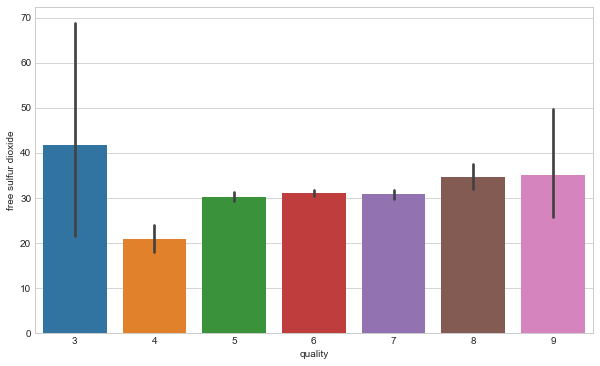

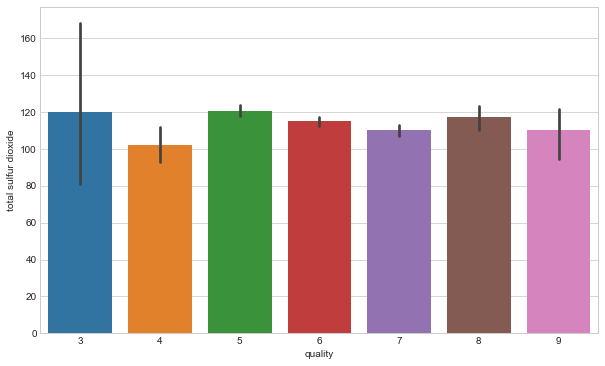

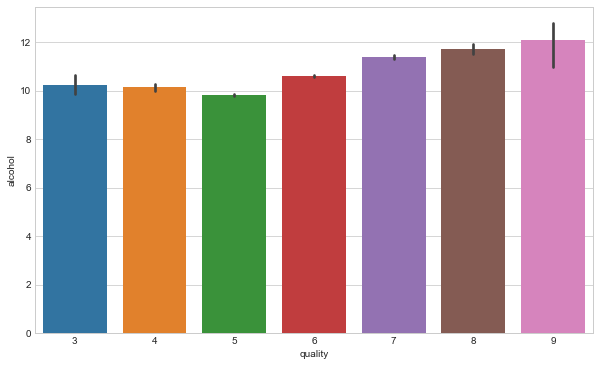

In [46]:
def EDA_barplot(features_train):
    #Here we see that fixed acidity does not give any specification to classify the quality.
    fig = plt.figure(figsize = (10,6))
    sns.barplot(x = 'quality', y = 'fixed acidity', data = features_train)
    plt.savefig("fixed_acid_barplot.png")
    
    #Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
    fig = plt.figure(figsize = (10,6))
    sns.barplot(x = 'quality', y = 'volatile acidity', data = features_train)
    plt.savefig("volatile_acid_barplot.png")
    
    #Composition of citric acid go higher as we go higher in the quality of the wine
    fig = plt.figure(figsize = (10,6))
    sns.barplot(x = 'quality', y = 'citric acid', data = features_train)
    plt.savefig("citric_acid_barplot.png")
    
    fig = plt.figure(figsize = (10,6))
    sns.barplot(x = 'quality', y = 'residual sugar', data = features_train)
    plt.savefig("residual_sugar_barplot.png")

    #Composition of chloride also go down as we go higher in the quality of the wine
    fig = plt.figure(figsize = (10,6))
    sns.barplot(x = 'quality', y = 'chlorides', data = features_train)
    plt.savefig("chlorides_barplot.png")

    fig = plt.figure(figsize = (10,6))
    sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = features_train)
    plt.savefig("sulfur_dioxide_barplot.png")

    fig = plt.figure(figsize = (10,6))
    sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = features_train)
    plt.savefig("sulfur_dioxide_barplot.png")
    
    #Alcohol level also goes higher as te quality of wine increases
    fig = plt.figure(figsize = (10,6))
    sns.barplot(x = 'quality', y = 'alcohol', data = features_train)
    plt.savefig("alcohol_barplot.png")
    
EDA_barplot(original_train_data)


### EDA using Pairplot

In [29]:
def EDF_Pairplot(features_train):

    print("Plot 1")
    g = sns.pairplot(features_train,vars=["quality","alcohol","volatile acidity","free sulfur dioxide"], hue="quality", palette="Set2", diag_kind="kde", size=2.5)
    plt.savefig("pairlot1.png")
    print("Plot 2")
    g = sns.pairplot(features_train,vars=["quality","citric acid","fixed acidity","pH"], hue="quality", palette="Set2", diag_kind="kde", size=2.5)
    plt.savefig("pairlot2.png")
    
#EDF_Pairplot(original_train_data)

## Step 5:Spliting and preparing data for training

### Feature Engineering with features_data 

In [6]:
def feature_engineering():
    import numpy as np
   
    feature = original_train_data["total sulfur dioxide"] 
    feature1 = original_train_data["free sulfur dioxide"] 
    original_train_data["t/f"] = 1/(feature1 / feature) 
    
   
    return original_train_data
original_train_data = feature_engineering()

### Split data into feature and labels

In [33]:
def split_feature_label():
    # Extract features and labels
    label_data = original_train_data['quality']
    feature_data = original_train_data.drop('quality', axis = 1)
    return [feature_data,label_data]
[feature_data,label_data] = split_feature_label()

### Normalize

In [24]:
def normalize(features_data):
    from sklearn import preprocessing
    X_normalized = preprocessing.normalize(features_data, norm='l2')
    return X_normalized
feature_data = normalize(feature_data)
#analyse_dataset(pd.DataFrame(feature_data),12)

### Data Preparation

No need to for data conversion such as one hot encoding(data already numeric).
Extract labels and features from dataset.
Split dataset into train and test(labels and features).


In [34]:
def split_data_into_test_train(ratio):
    
    # List of features for later use
    feature_list = list(original_train_data.columns)

    labels = np.array(label_data)
    features = np.array(feature_data)
   
    #features = normalize(features)
    
    # Training and Testing Sets
    from sklearn.model_selection import train_test_split

    train_features, test_features, train_labels, test_labels = train_test_split(feature_data, label_data, 
                                                                                test_size = ratio, random_state = 42)
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)
    
    return [train_features, test_features, train_labels, test_labels, feature_list]

[train_features, test_features, train_labels, test_labels, feature_list] = split_data_into_test_train(ratio=0.25)

Training Features Shape: (3862, 12)
Training Labels Shape: (3862,)
Testing Features Shape: (1288, 12)
Testing Labels Shape: (1288,)


## Step 6:Feature Engineering

#### Determine importance of features using base model

Train base RandomForestRegressor algorithm using training features and labels

Variable: alcohol              Importance: 0.25
Variable: volatile acidity     Importance: 0.12
Variable: free sulfur dioxide  Importance: 0.09
Variable: residual sugar       Importance: 0.08
Variable: sulphates            Importance: 0.08
Variable: total sulfur dioxide Importance: 0.07
Variable: fixed acidity        Importance: 0.06
Variable: citric acid          Importance: 0.06
Variable: chlorides            Importance: 0.06
Variable: density              Importance: 0.06
Variable: pH                   Importance: 0.06
Variable: type                 Importance: 0.0
Number of features for 95% importance: 11
Train data: (3862, 12)


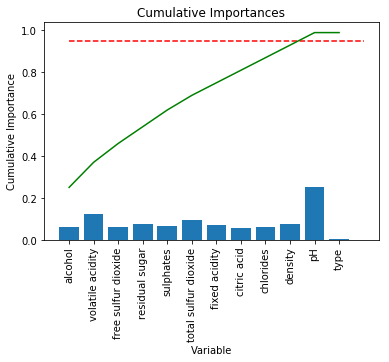

In [35]:
def determine_feature_importance(feature_data,label_data):
    # Import the model we are using
    from sklearn.ensemble import RandomForestRegressor

    # Instantiate model 
    rfr = RandomForestRegressor(random_state=42)

    # Train the model on training data
    rfr.fit(feature_data, label_data)
    
    # Get numerical feature importances
    importances = list(rfr.feature_importances_)
 
    # List of tuples with variable and importance
    feature_importances = [(feature_data, round(importance, 2)) for feature_data, importance in zip(feature_list, importances)]

    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

    # Print out the feature and importances 
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    
    #-------------------------------------------------------------------------
    
    # Import matplotlib for plotting and use magic command for Jupyter Notebooks
    import matplotlib.pyplot as plt
    # list of x locations for plotting
    x_values = list(range(len(importances)))

    # Make a bar chart
    plt.bar(x_values, importances, orientation = 'vertical')

    # Tick labels for x axis
    plt.xticks(x_values, feature_list, rotation='vertical')

    # Axis labels and title
    plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
    
    #------------------------------------------------------------------------------------
   
    # List of features sorted from most to least important
    sorted_importances = [importance[1] for importance in feature_importances]
    sorted_features = [importance[0] for importance in feature_importances]

    # Cumulative importances
    cumulative_importances = np.cumsum(sorted_importances)

    # Make a line graph
    plt.plot(x_values, cumulative_importances, 'g-')

    # Draw line at 95% of importance retained
    plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

    # Format x ticks and labels
    plt.xticks(x_values, sorted_features, rotation = 'vertical')

    # Axis labels and title
    plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

    # Find number of features for cumulative importance of 95%
    # Add 1 because Python is zero-indexed
    print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)
    print("Train data:",train_features.shape)
determine_feature_importance(train_features,train_labels)

Determine the importance of features in the wine dataset using base RandomForest algorithm

Plot the importance of features in a histogram

Plot cumulative importance of the features

10 features from the dataset have more than 95 percent importance in the trained model

#### Restrict to the Most Important Features

The feature "type" and "density" are not very important for the training of the model
Therefore these two features are left out from the training data.

Build test and train data with important features

In [151]:
def restrict_features_of_data(train_features,test_features,feature_list):
    # Names of five importances accounting for 95% of total importance
    important_feature_names = ['fixed acidity',
     'volatile acidity',
     'citric acid',
     'residual sugar',
     'chlorides',
     'free sulfur dioxide',
     'total sulfur dioxide',
     'pH',
     'sulphates',
     'alcohol']    
    
           
    # Find the columns of the most important features
    important_indices = [feature_list.index(feature) for feature in important_feature_names]

    # Create training and testing sets with only the important features
    important_train_features = train_features[:, important_indices]
    important_test_features = test_features[:, important_indices]

    # Sanity check on operations
    print('Important train features shape:', important_train_features.shape)
    print('Important test features shape:', important_test_features.shape)
    
    # Use only the most important features
    train_features = important_train_features[:]
    test_features = important_test_features[:]
    # Update feature list for visualizations
    feature_list = important_feature_names
    return [train_features,test_features]

[train_features,test_features] = restrict_features_of_data(train_features,test_features,feature_list)

Important train features shape: (3862, 10)
Important test features shape: (1288, 10)


## Step 7)Training the RandomForestRegressor model

In [78]:
def test_Simple_Training_Algorithms(train_features,train_labels,test_features,test_label):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.svm import SVR
    from sklearn.metrics import mean_absolute_error
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    models = []
    
    models.append(( 'LinearR' , LinearRegression()))

    models.append(( 'SVR' , SVR()))

    models.append(( 'RF' , RandomForestRegressor()))
    
    models.append(( 'GBR' , GradientBoostingRegressor()))
    
    models.append(( 'KNR' , KNeighborsRegressor()))


    # evaluate each model in turn
    results = []

    names = []
    best_model_error = 1.7976931348623157e+308
     
    for name, model in models: 
        model.fit(train_features,train_labels)
        y_pred = model.predict(test_features).round()
        names.append(name)
        error = mean_absolute_error(y_pred,test_label)
        msg = "%s: %f" % (name, error)
        print(msg)
        if(best_model_error>error):
            best_model_error = error
            best_model = model
            best_model_name = name
         
    return [best_model,best_model_name]

[best_random,model_name] = test_Simple_Training_Algorithms(train_features,train_labels,test_features,test_labels)
print("Best Model is ",model_name)

LinearR: 0.612578
SVR: 0.668478
RF: 0.437888
GBR: 0.526398
KNR: 0.611025
Best Model is  RF


Examine the default parameters being used in the RandomForestRegressor

In [158]:
def RandomForest_Tuning_And_Testing(train_features,train_labels,test_features,test_label):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error
        
    models = []

    models.append(( 'Base RF' , RandomForestRegressor(random_state = 0)))
    
    models.append(( 'N_estimators =100 RF' , RandomForestRegressor(n_estimators = 100,random_state = 0)))
    
    models.append(( 'N_estimators =1000 RF' , RandomForestRegressor(n_estimators = 1000)))

    models.append(( 'N_estimators RF,verbose ' , RandomForestRegressor(n_estimators = 1000,random_state  = 0,warm_start  = True)))
    

    # evaluate each model in turn
    results = []

    names = []
    best_model_error = 1.7976931348623157e+308
     
    for name, model in models: 
        model.fit(train_features,train_labels)
        y_pred = model.predict(test_features).round()
        names.append(name)
        error = mean_absolute_error(y_pred,test_label)
        msg = "%s: %f" % (name, error)
        print(msg)
        if(best_model_error>error):
            best_model_error = error
            best_model = model
            best_model_name = name
         
    return [best_model,best_model_name]
#[best_random,model_name] = RandomForest_Tuning_And_Testing(train_important_features,train_labels,test_important_features,test_labels)

### Train RandomForestRegressor using Cross Validation

In [62]:
def random_search_for_optimal_parameters(features,labels):# Fitting Random Forest Classification to the Training set
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor(random_state=42)

    from pprint import pprint

    # Look at parameters used by our current forest
    print('Parameters currently in use:\n')
    pprint(rf.get_params())



    from sklearn.model_selection import RandomizedSearchCV

    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    print("Numer of Trees:",n_estimators)
    
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    print("Numer of features to consider at split:",max_features)
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
    print("Maximum number of levels in tree:",max_depth)
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    print("Minimum number of samples requires to split node",min_samples_split)
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    print("Minimum number of samples required at leaf node",min_samples_leaf)
    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}





    from sklearn.ensemble import RandomForestRegressor
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    #rf = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores

    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                  n_iter = 100, scoring='neg_mean_absolute_error', 
                                  cv = 4, verbose=2, random_state=42, n_jobs=-1)


    # Fit the random search model
    rf_random.fit(features, labels)
    print("Best Parameters",rf_random.best_params_ )
    print("Best Estimators",rf_random.best_estimator_)
    
    return rf_random.best_estimator_

#feature = original_train_data[important_feature_names]
#label = original_train_data['quality']
#best_random = random_search_for_optimal_parameters(feature,label)

In [161]:
def furtherImproveRF(train_features,train_labels):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators= 100, min_samples_split= 2, 
                                min_samples_leaf= 2, max_features= 'auto', 
                                max_depth= 10, bootstrap= True,random_state=42)
    
    return model.fit(train_features,train_labels)
rf = furtherImproveRF(train_features,train_labels)
evaluate(rf, test_features, test_labels)

Model Performance
Average Error: 0.4425 degrees.
Accuracy = 92.01%.
MAE: 0.44254658385093165


Original Features: (1347, 13)
Train Features: (3862, 12)
Test Features: (1288, 12)
Model Performance
Average Error: 0.3991 degrees.
Accuracy = 92.79%.
MAE: 0.39906832298136646


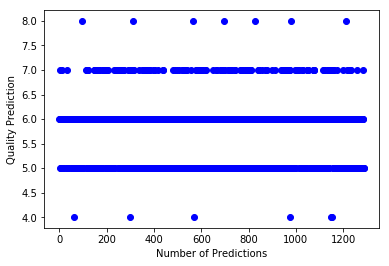

In [31]:
def base_forest_performance():
    from sklearn.ensemble import RandomForestRegressor
    base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    base_model.fit(train_features, train_labels)
    evaluate(base_model, test_features, test_labels)
    return base_model
print("Original Features:",original_test_data.shape)
print("Train Features:",train_features.shape)
print("Test Features:",test_features.shape)
file = "new_submission.csv"
base_model = base_forest_performance()
predict_model_on_test(file,base_model,test_features)

## Step 8:Evaluation of the trained model

### Evaluation Function

In [29]:
def evaluate(model, test_features, test_labels):
    from sklearn.metrics import mean_absolute_error
    predictions = model.predict(test_features).round()
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("MAE:",mean_absolute_error(predictions,test_labels))
    
#evaluate(rf, test_important_features, test_labels)

Evaluate the Default Model

Evaluate the Best Random Search Model

## Step 9:Predict test data and write to a file

In [30]:
def predict_model_on_test(file,best_random,data_test):  
    write_test_pred = best_random.predict(data_test).round()
    arange = np.arange(1,write_test_pred.size+1)
    df = pd.DataFrame({"id" : arange, "prediction" : write_test_pred})
    df.to_csv(file, index=False)
    import matplotlib.pyplot as plt
    plt.scatter(range(0,len(write_test_pred)),write_test_pred,color='blue')
    plt.xlabel("Number of Predictions")
    plt.ylabel("Quality Prediction")
    plt.savefig("predict_test_plot.png")
    plt.show()
    
#predict_model_on_test("new_submission.csv",best_random,original_test_data,important_feature_names)